# Simulation of Process Drift

## Setup

In [363]:
import numpy as np
import math
import random
import process_simulation
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy

Global settings

In [364]:
load_results_from_path = True

## Replication of Results by Pentland

First simulation with static parameter settings

In [365]:
### simulation parameters
n = 5000 # number of time steps
l = 300 # lexicon: number of different process steps
m = 5 # number of subunits of the process, needs to be a factor of l
r = 100 # size of the history matrix

v = 0.01 # chance of variation

max_sequence_length = 100 * l # cut-off sequences longer than this value to avoid infinite loops.

In [366]:
my_simulation = process_simulation.ProcessSimulationPentland(n, l, m, r, v, max_sequence_length)

In [367]:
adjacency_matrices = my_simulation.run_simulation(record_am=range(0, n, 10))

In [368]:
results_df = process_simulation.summarize_sim_results(adjacency_matrices)
results_df.head()

,number of nodes,number of connected nodes,number of edges,average degree,control flow complexity,depth,density,est. count shortest simple paths
time,,,,,,,,
0,300.0,300.0,299.0,0.996667,298.0,300.0,0.003333,1.000000e+00
10,300.0,300.0,324.0,1.080000,298.0,102.0,0.003612,1.000000e+02
20,300.0,300.0,347.0,1.156667,298.0,87.0,0.003868,6.918310e+03
30,300.0,300.0,376.0,1.253333,298.0,43.0,0.004192,1.445440e+06
40,300.0,300.0,403.0,1.343333,299.0,30.0,0.004493,2.089296e+08


## Comparisson of Complexity metrics

In [369]:
results_df_norm = pd.DataFrame()

# normalize all complexity metrics to plot them in one graph and observe their differences
def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in results_df.columns:
    results_df_norm[col] = absolute_maximum_scale(results_df[col])

# drop the number of nodes column
results_df_norm = results_df_norm.drop(columns=['number of nodes', 'control flow complexity'])

# only show a few timestamps
# print(results_df_norm.iloc[::5].to_latex())
results_df_norm.iloc[::100]

,number of connected nodes,number of edges,average degree,depth,density,est. count shortest simple paths
time,,,,,,
0,1.000000,0.199733,0.196131,1.000000,0.180828,5.754399e-97
1000,1.000000,0.783567,0.769438,0.060000,0.709404,4.786301e-27
2000,1.000000,0.886440,0.870455,0.056667,0.802539,1.000000e-14
3000,0.946667,0.877088,0.909794,0.050000,0.886233,1.445440e-14
4000,0.866667,0.695391,0.787905,0.023333,0.838621,2.089296e-34


In [370]:
results_df_norm.corr()

,number of connected nodes,number of edges,average degree,depth,density,est. count shortest simple paths
number of connected nodes,1.000000,0.619237,0.239018,0.331071,-0.469305,0.037508
number of edges,0.619237,1.000000,0.909766,-0.095534,0.399292,0.116534
average degree,0.239018,0.909766,1.000000,-0.293592,0.741762,0.124126
depth,0.331071,-0.095534,-0.293592,1.000000,-0.479612,0.009230
density,-0.469305,0.399292,0.741762,-0.479612,1.000000,0.087798
est. count shortest simple paths,0.037508,0.116534,0.124126,0.009230,0.087798,1.000000


<Figure size 432x288 with 0 Axes>

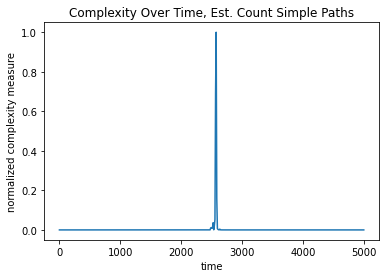

In [371]:
f = plt.figure()
ax = results_df_norm[['est. count shortest simple paths']].plot(title="Complexity Over Time, Est. Count Simple Paths")
ax.set_ylabel("normalized complexity measure")
ax.get_legend().remove()
plt.savefig('experiment_results/plot_complexity_simple paths.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

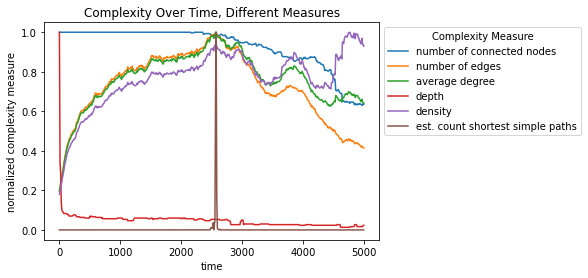

In [372]:
f = plt.figure()
ax = results_df_norm.plot(title="Complexity Over Time, Different Measures")
ax.set_ylabel("normalized complexity measure")
legend = plt.legend(title='Complexity Measure', bbox_to_anchor=(1.0, 1.0))
legend_frame = legend.get_frame()
legend_frame.set_facecolor('white')

plt.savefig('experiment_results/plot_complexity_measures.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='time'>

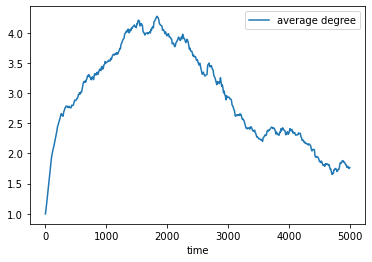

In [81]:
results_df.plot(y='average degree')

<AxesSubplot:xlabel='time'>

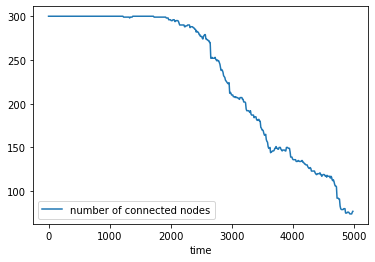

In [82]:
results_df.plot(y='number of connected nodes')

## Plot some graphs at different times    

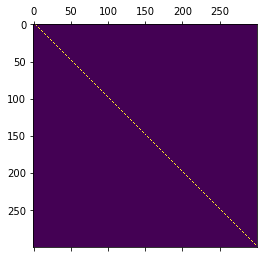

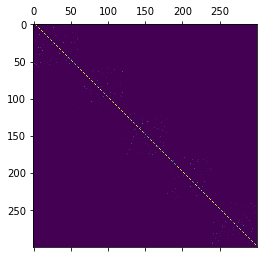

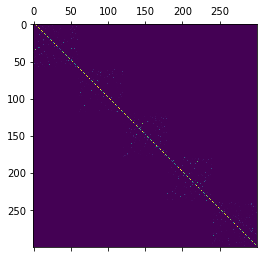

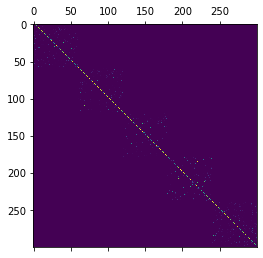

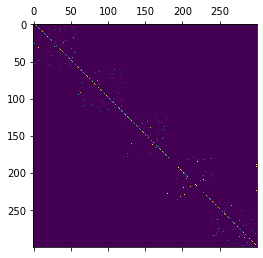

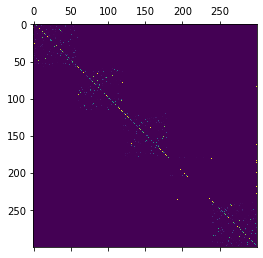

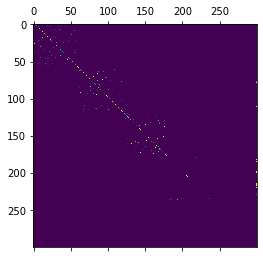

In [373]:
plot_matrixes = [0, 1000, 1500, 2000, 3000, 4000, 4990]
for time, adjacency_matrix in adjacency_matrices.items():
    if time in plot_matrixes:
        # get the graph object
        # graph = nx.from_numpy_matrix(adjacency_matrix)
        # plt.figure(time)
        # nx.draw_kamada_kawai(graph)
        plt.matshow(adjacency_matrix)

In [374]:
%%script false --no-raise-error

### simulation parameters
n = 400 # number of time steps
ls = [100, 300 # 400] # lexicon: number of different process steps
ms = [1, 5, 20] #10, 20] # number of subunits of the process, needs to be a factor of l
rs = [0, 100, 200] #100, 150, 200] # size of the history matrix
vs = [0.001, 0.1] # 0.005, 0.01] # chance of variation

all_results_list = []
for l in ls:
    max_sequence_length = 100 * l # cut-off sequences longer than this value to avoid infinite loops.
    for m in ms:
        for r in rs:
            for v in vs:
                my_simulation = process_simulation.ProcessSimulationPentland(n, l, m, r, v, max_sequence_length)
                adjacency_matrices = my_simulation.run_simulation(record_am=range(1,n+1))
                result_df = process_simulation.summarize_sim_results(adjacency_matrices)
                result_row = result_df.mean(axis=0)

                result = {}
                result['l'] = l
                result['m'] = m
                result['r'] = r
                result['v'] = v
                
                result = result | result_row.to_dict()
                all_results_list.append(result)
      
results_df = pd.DataFrame(all_results_list)
display(results_df)
display(results_df[['l', 'm', 'r', 'v', 'est. count shortest simple paths']])

Couldn't find program: 'false'


# Extension of the Pentland simulation

For all analyses consider
n = 1000
l = 100
m = 1
r = 50
max_sequence_length = 100 * l

Szenarios to analyze:
1. Impact of degree of automation to process complexity behavior. Investigate a between 0 and 1 in 0.1 steps.
1. Fully automized process with some non-standard case input

### Impact of Degree of Automation
#### RQ1.1

In [415]:
### simulation parameters
## fixed
n = 2000 # number of time steps
l = 200 # lexicon: number of different process steps
m = 5 # number of subunits of the process, needs to be a factor of l
r = 50 # size of the history matrix

max_sequence_length = l * 100 # cut-off sequences longer than this value to avoid infinite loops.

# extended parameters

v_h = 0.005 # chance of variation for a human actor
v_a = 0.0001 # chance of variation for an automized activity

i = 0 # percentage of non-standard case input
v_h_i = v_h # chance of variation for a human actor if process input is non-standard
v_a_i = v_a # chance of variation if automized activity if process input is non-standard

complexity_measure = 'Average Degree'

# TODO set for final experiment
runs_per_experiment = 10 # number of runs for each experiment
experiments = 10

a_values = [i/experiments for i in range(0, experiments + 1, 1)] # percentage of activities that are automated

In [416]:
a_results_path = os.path.join('experiment_results', 'results_a_values_cat.pkl')

simulation_results = []
if load_results_from_path:
    with open(a_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for a in a_values:
        print(a)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiments(record_am=range(0, n, int(n/100)), number_runs=runs_per_experiment)
        simulation_results.append(results_df)

    # save simulation results to file
    with open(a_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

In [417]:
simulation_results[0]

number of nodes  number of connected nodes  number of edges  \
run time                                                                
0   0               200.0                      200.0            199.0   
    50              200.0                      200.0            250.0   
    100             200.0                      200.0            270.0   
    150             200.0                      200.0            315.0   
    200             200.0                      200.0            296.0   
...                   ...                        ...              ...   
9   4750            200.0                        6.0              7.0   
    4800            200.0                        6.0              7.0   
    4850            200.0                        6.0              7.0   
    4900            200.0                        7.0              9.0   
    4950            200.0                        6.0              7.0   

          average degree  control flow complexity  depth   density  \
run time                                                             
0   0           0.995000                    198.0  200.0  0.005000   
    50          1.250000                    200.0   12.0  0.006281   
    100         1.350000                    199.0    8.0  0.006784   
    150         1.575000                    200.0    6.0  0.007915   
    200         1.480000                    199.0    9.0  0.007437   
...                  ...                      ...    ...       ...   
9   4750        1.166667                      6.0    3.0  0.233333   
    4800        1.166667                      6.0    3.0  0.233333   
    4850        1.166667                      6.0    3.0  0.233333   
    4900        1.285714                      7.0    3.0  0.214286   
    4950        1.166667                      6.0    3.0  0.233333   

          est. count shortest simple paths  
run time                                    
0   0                         1.000000e+00  
    50                        1.202264e+04  
    100                       4.786301e+05  
    150                       1.905461e+09  
    200                       5.754399e+07  
...                                    ...  
9   4750                      1.445440e+00  
    4800                      1.445440e+00  
    4850                      1.445440e+00  
    4900                      1.737801e+00  
    4950                      1.445440e+00  

[1000 rows x 8 columns]

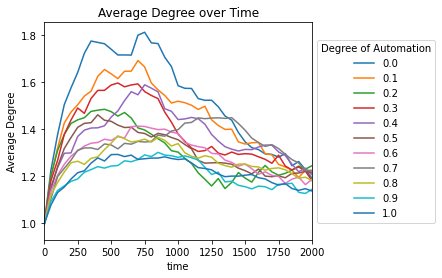

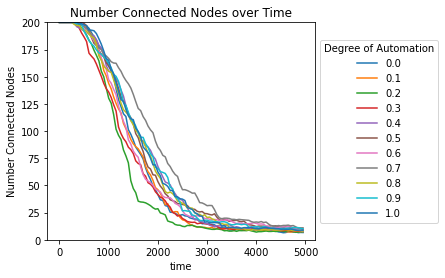

In [418]:
avg_simulation_results = [simulation_result.groupby(level=1).mean() for simulation_result in simulation_results]

# overlay the complexity curve of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = complexity_measure.lower(),ax = ax, label = a_value)
ax.set_ylabel(complexity_measure)
ax.set_xlim(0, 2000)
ax.set_title(f"{complexity_measure} over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Degree of Automation')
legend_frame = legend.get_frame()
legend_frame.set_facecolor('white')

plt.savefig('experiment_results/rq11_avg_deg_time.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# overlay the number_of_connected_nodes of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = 'number of connected nodes', ax = ax, label = a_value)
ax.set_ylabel("Number Connected Nodes")
ax.set_ylim(0, l)
ax.set_title("Number Connected Nodes over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Degree of Automation')

pass

In [419]:
runs = 200

a_values = [random.random() for i in range(runs)] # percentage of activities that are automated
a_results_path = os.path.join('experiment_results', 'results_a_values_rand.pkl')

simulation_results = []
if load_results_from_path:
    with open(a_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for a in a_values:
        print(a)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiment(record_am=range(0, n, int(n/100)))
        sim_settings = own_process_simulation.get_settings()
        
        results_settings_dict = {
            'results_df': results_df,
            'settings': sim_settings
        }
        
        simulation_results.append(results_settings_dict)

    # save simulation results to file
    with open(a_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

In [420]:
time_to_measure = 200

results_list = []
# extract the speed of change from the results dataframe
for simulation_result in simulation_results:
    a = simulation_result['settings']['a']
    results_df = simulation_result['results_df']
    
    initial_complexity = results_df.loc[0][complexity_measure.lower()]
    complexities_after_time = results_df.loc[time_to_measure][complexity_measure.lower()]
    change_of_complexity = complexities_after_time - initial_complexity
    speed_of_change = change_of_complexity / time_to_measure

    results_list.append((a, speed_of_change))

automation_speed_df = pd.DataFrame(results_list, columns=['degree of automation', 'speed to complexity'])
automation_speed_df

,degree of automation,speed to complexity
0,0.992964,0.001100
1,0.096004,0.001650
2,0.548536,0.001675
3,0.621070,0.001225
4,0.250238,0.002300
...,...,...
195,0.842806,0.001075
196,0.489352,0.003225
197,0.801420,0.001125
198,0.397636,0.001425


<AxesSubplot:title={'center':'RQ1.1 Degree of Automation and Speed to Complexity'}, xlabel='degree of automation', ylabel='speed to complexity'>

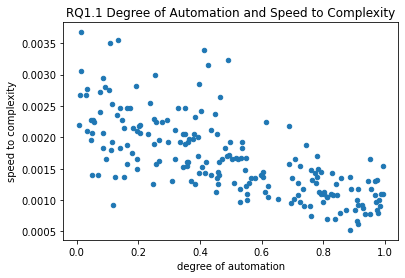

In [421]:
automation_speed_df.plot.scatter(x='degree of automation', y='speed to complexity', title='RQ1.1 Degree of Automation and Speed to Complexity')

In [422]:
stats.spearmanr(automation_speed_df['degree of automation'], automation_speed_df['speed to complexity'], alternative='less')

SpearmanrResult(correlation=-0.7477590475938863, pvalue=2.30138994959456e-37)

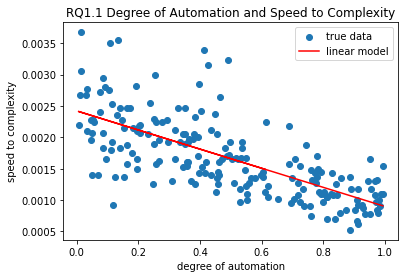

In [423]:
# model fitting
x_reshaped = automation_speed_df['degree of automation'].values.reshape(-1, 1) 
y_reshaped = automation_speed_df['speed to complexity'].values.reshape(-1, 1)

linear_regressor = linear_model.LinearRegression()  # create object for the class
linear_regressor.fit(x_reshaped, y_reshaped)  # perform linear regression
y_linear = linear_regressor.predict(x_reshaped)  # make predictions

# visualizatoin
x = automation_speed_df['degree of automation']
y = automation_speed_df['speed to complexity']
plt.title('RQ1.1 Degree of Automation and Speed to Complexity')
plt.scatter(x, y, label = 'true data')

plt.plot(x, y_linear, color='red', label = 'linear model')

plt.xlabel('degree of automation')
plt.ylabel('speed to complexity')
plt.legend()

plt.savefig('experiment_results/rq11_scatter_fitted.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

#### RQ1.2

In [424]:
results_list = []
# extract the speed of change from the results dataframe
for simulation_result in simulation_results:
    a = simulation_result['settings']['a']
    results_df = simulation_result['results_df']
    
    max_complexity = max(results_df[complexity_measure.lower()])
    results_list.append((a, max_complexity))

automation_max_complexity_df = pd.DataFrame(results_list, columns=['degree of automation', 'max complexity'])
automation_max_complexity_df

,degree of automation,max complexity
0,0.992964,1.245000
1,0.096004,2.210000
2,0.548536,1.819149
3,0.621070,1.497487
4,0.250238,2.170000
...,...,...
195,0.842806,1.302469
196,0.489352,1.675000
197,0.801420,1.275000
198,0.397636,1.421053


<AxesSubplot:title={'center':'RQ1.2 Degree of Automation and Max Complexity'}, xlabel='degree of automation', ylabel='max complexity'>

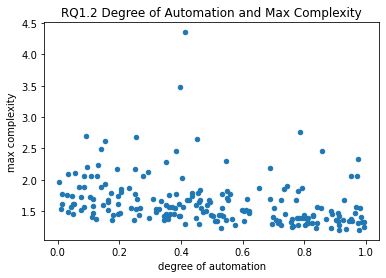

In [425]:
automation_max_complexity_df.plot.scatter(x='degree of automation', y='max complexity', title='RQ1.2 Degree of Automation and Max Complexity')

In [426]:
stats.spearmanr(automation_max_complexity_df['degree of automation'], automation_max_complexity_df['max complexity'], alternative='less')

SpearmanrResult(correlation=-0.4565590533260178, pvalue=5.422587781226563e-12)

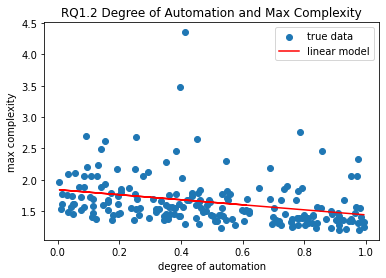

In [427]:
# automation_max_complexity_df.plot.scatter(x='degree of automation', y='max complexity', title='RQ1.2 Degree of Automation and Max Complexity')

# x = automation_max_complexity_df['degree of automation'].values.reshape(-1, 1) 
# y = automation_max_complexity_df['max complexity'].values.reshape(-1, 1)

# linear_regressor = linear_model.LinearRegression()  # create object for the class
# linear_regressor.fit(x, y)  # perform linear regression
# y_linear = linear_regressor.predict(x)  # make predictions

# plt.plot(x, y_linear, color='red')
# plt.savefig('experiment_results/rq12_scatter_fitted.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
# plt.show()

# model fitting
x_reshaped = automation_max_complexity_df['degree of automation'].values.reshape(-1, 1) 
y_reshaped = automation_max_complexity_df['max complexity'].values.reshape(-1, 1)

linear_regressor = linear_model.LinearRegression()  # create object for the class
linear_regressor.fit(x_reshaped, y_reshaped)  # perform linear regression
y_linear = linear_regressor.predict(x_reshaped)  # make predictions


# visualizatoin
x = automation_max_complexity_df['degree of automation']
y = automation_max_complexity_df['max complexity']
plt.title('RQ1.2 Degree of Automation and Max Complexity')
plt.scatter(x, y, label = 'true data')

plt.plot(x, y_linear, color='red', label = 'linear model')

plt.xlabel('degree of automation')
plt.ylabel('max complexity')
plt.legend()

plt.savefig('experiment_results/rq12_scatter_fitted.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

### RQ2

We run five scenarios for RQ2:

    a = 0, a = 0.25, a = 0.5, a = 0.75, a = 1

In [428]:
v_h_i = 0.01 # chance of variation for a human actor if process input is non-standard
v_a_i = 0.03 # chance of variation if automized activity if process input is non-standard

runs = 200
a_values = [0, 0.25, 0.5, 0.75, 1]

In [429]:
rq2_simulation_results = {}
rq2_results_path = os.path.join('experiment_results', f'rq2_results.pkl')

if load_results_from_path:
    with open(rq2_results_path, 'rb') as f:
        rq2_simulation_results = pickle.load(f)
else:
    for a in a_values:
        print(a)
        simulation_results = []
        
        i_values = [random.random() for i in range(runs)] # percentage of non-standard case input
        for i in i_values:
            own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
            results_df = own_process_simulation.run_experiment(record_am=range(0, n, int(n/100)))
            sim_settings = own_process_simulation.get_settings()

            results_settings_dict = {
                'results_df': results_df,
                'settings': sim_settings
            }
            simulation_results.append(results_settings_dict)
        rq2_simulation_results[a] = simulation_results

    # save simulation results to file
    with open(rq2_results_path, 'wb') as f:
        pickle.dump(rq2_simulation_results, f)

### a=0.5

In [430]:
a_value = 0.5

In [431]:
simulation_results = rq2_simulation_results[a_value]

### RQ2.1

In [432]:
time_to_measure = 200

results_list =  []
# compute the speed of growth for the complexity measure until time x
for simulation_result in simulation_results:
    i = simulation_result['settings']['i']
    results_df = simulation_result['results_df']
    
    initial_complexity = results_df.loc[0][complexity_measure.lower()]
    complexities_after_time = results_df.loc[time_to_measure][complexity_measure.lower()]
    change_of_complexity = complexities_after_time - initial_complexity
    speed_of_change = change_of_complexity / time_to_measure

    results_list.append((i, speed_of_change))

automation_speed_df = pd.DataFrame(results_list, columns=['non-standard ratio', 'speed to complexity'])
automation_speed_df

,non-standard ratio,speed to complexity
0,0.564702,0.005625
1,0.396436,0.008750
2,0.585409,0.007650
3,0.951773,0.011400
4,0.796187,0.007525
...,...,...
195,0.499789,0.003200
196,0.152724,0.004075
197,0.152806,0.002475
198,0.790311,0.005925


<AxesSubplot:title={'center':'RQ2.1 Non-Standard Ratio and Speed to Complexity'}, xlabel='non-standard ratio', ylabel='speed to complexity'>

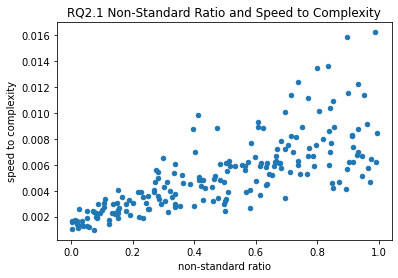

In [433]:
automation_speed_df.plot.scatter(x='non-standard ratio', y='speed to complexity', title='RQ2.1 Non-Standard Ratio and Speed to Complexity')

In [434]:
stats.spearmanr(automation_speed_df['non-standard ratio'], automation_speed_df['speed to complexity'], alternative='greater')

SpearmanrResult(correlation=0.829046812632638, pvalue=3.528320376130512e-52)

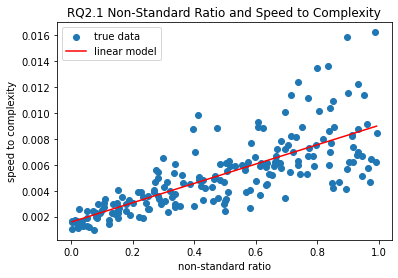

In [436]:
automation_speed_df = automation_speed_df.sort_values(['non-standard ratio'])

# model fitting
x_reshaped = automation_speed_df['non-standard ratio'].values.reshape(-1, 1) 
y_reshaped = automation_speed_df['speed to complexity'].values.reshape(-1, 1)

linear_regressor = linear_model.LinearRegression()  # create object for the class
linear_regressor.fit(x_reshaped, y_reshaped)  # perform linear regression
y_linear = linear_regressor.predict(x_reshaped)  # make predictions

# visualizatoin
x = automation_speed_df['non-standard ratio']
y = automation_speed_df['speed to complexity']
plt.title('RQ2.1 Non-Standard Ratio and Speed to Complexity')
plt.scatter(x, y, label = 'true data')

plt.plot(x, y_linear, color='red', label = 'linear model')

plt.xlabel('non-standard ratio')
plt.ylabel('speed to complexity')
plt.legend()

plt.savefig('experiment_results/rq21_scatter_fitted.png', dpi=300, bbox_inches='tight')
plt.show()

Linear r2: 1.0
Exp r2: 0.9835648865910056
Pol r2: 0.9999999995554751
Power r2: 0.9983226062992406
Log r2: 0.753154933857739


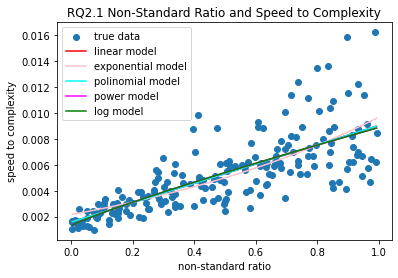

In [439]:
# fit some models to the data

x = automation_speed_df['non-standard ratio']#.values.reshape(-1, 1) 
y = automation_speed_df['speed to complexity']#.values.reshape(-1, 1)

def lin_model(x, a, b):
    return a + b * x

def exp_model(x, a, b):
    return a + b * np.exp(x)
                         
def pol_model(x, a, b, c):
    return a + b * c**x

def power_model(x, a, b, c):
    return a + b * x**c
    # return a + x**c

def log_model(x, a, b, c):
    return a + b * np.log(x**c)

def fit_predict_model(model, x):
    popt, pcov = scipy.optimize.curve_fit(model, x, y)
    return model(x, *popt)

pred_lin = fit_predict_model(lin_model, x)
pred_exp = fit_predict_model(exp_model, x)
pred_pol = fit_predict_model(pol_model, x)
pred_power = fit_predict_model(power_model, x)
pred_log = fit_predict_model(log_model, x)


def get_r2(actual, pred):
    corr_matrix = np.corrcoef(actual, pred)
    corr = corr_matrix[0,1]
    r2 = corr**2
    return r2

print(f'Linear r2: {get_r2(x, pred_lin)}')
print(f'Exp r2: {get_r2(x, pred_exp)}')
print(f'Pol r2: {get_r2(x, pred_pol)}')
print(f'Power r2: {get_r2(x, pred_power)}')
print(f'Log r2: {get_r2(x, pred_log)}')

automation_speed_df = automation_speed_df.sort_values(['non-standard ratio'])

# visualization
x = automation_speed_df['non-standard ratio']
y = automation_speed_df['speed to complexity']
plt.title('RQ2.1 Non-Standard Ratio and Speed to Complexity')
plt.scatter(x, y, label = 'true data')

plt.plot(x, pred_lin, color='red', label="linear model")
plt.plot(x, pred_exp, color='pink', label="exponential model")
plt.plot(x, pred_pol, color='cyan', label="polinomial model")
plt.plot(x, pred_power, color='magenta', label="power model")
plt.plot(x, pred_power, color='green', label="log model")

plt.xlabel('non-standard ratio')
plt.ylabel('speed to complexity')
plt.legend()

plt.savefig('experiment_results/rq21_scatter_fitted.png', dpi=300, bbox_inches='tight')
plt.show()

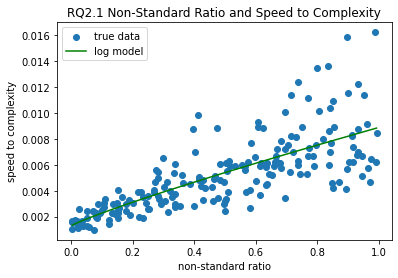

In [440]:
x = automation_speed_df['non-standard ratio']
y = automation_speed_df['speed to complexity']
plt.title('RQ2.1 Non-Standard Ratio and Speed to Complexity')
plt.scatter(x, y, label = 'true data')

plt.plot(x, pred_power, color='green', label="log model")

plt.xlabel('non-standard ratio')
plt.ylabel('speed to complexity')
plt.legend()

plt.savefig('experiment_results/rq21_scatter_fitted_log.png', dpi=300, bbox_inches='tight')
plt.show()

#### RQ2.2

In [307]:
results_list = []
# extract the speed of change from the results dataframe
for simulation_result in simulation_results:
    i = simulation_result['settings']['i']
    results_df = simulation_result['results_df']
    
    max_complexity = max(results_df[complexity_measure.lower()])
    results_list.append((i, max_complexity))

non_standard_max_complexity_df = pd.DataFrame(results_list, columns=['non-standard ratio', 'max complexity'])
non_standard_max_complexity_df

,non-standard ratio,max complexity
0,0.564702,2.170000
1,0.396436,3.010000
2,0.585409,2.590000
3,0.951773,3.409091
4,0.796187,2.745000
...,...,...
195,0.499789,2.240000
196,0.152724,3.140000
197,0.152806,1.595855
198,0.790311,2.200000


<AxesSubplot:title={'center':'RQ2.2 Non-Standard Ratio and Max Complexity'}, xlabel='non-standard ratio', ylabel='max complexity'>

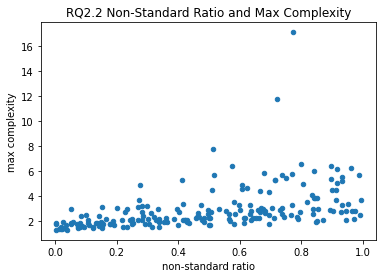

In [308]:
non_standard_max_complexity_df.plot.scatter(x='non-standard ratio', y='max complexity', title='RQ2.2 Non-Standard Ratio and Max Complexity')

In [309]:
stats.spearmanr(non_standard_max_complexity_df['non-standard ratio'], non_standard_max_complexity_df['max complexity'], alternative='greater')

SpearmanrResult(correlation=0.6715643203441978, pvalue=6.919993519154556e-28)

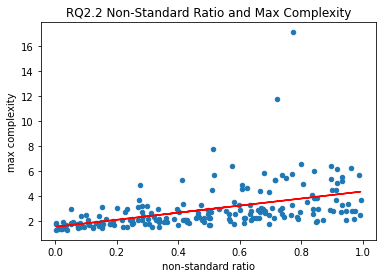

In [310]:
non_standard_max_complexity_df.plot.scatter(x='non-standard ratio', y='max complexity', title='RQ2.2 Non-Standard Ratio and Max Complexity')

x = non_standard_max_complexity_df['non-standard ratio'].values.reshape(-1, 1) 
y = non_standard_max_complexity_df['max complexity'].values.reshape(-1, 1)

linear_regressor = linear_model.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_linear = linear_regressor.predict(x)  # make predictions

plt.plot(x, y_linear, color='red')
plt.savefig('experiment_results/rq22_scatter_fitted.png', dpi=300, bbox_inches='tight')
plt.show()



## RQ2 Analysis across different "a" values 
#### Analysis of speed to complexity

In [311]:
automation_speed_list = []
for a_value in a_values:
    simulation_results = rq2_simulation_results[a_value]
    
    time_to_measure = 200

    # compute the speed of growth for the complexity measure until time x
    for simulation_result in simulation_results:
        i = simulation_result['settings']['i']
        results_df = simulation_result['results_df']

        initial_complexity = results_df.loc[0][complexity_measure.lower()]
        complexities_after_time = results_df.loc[time_to_measure][complexity_measure.lower()]
        change_of_complexity = complexities_after_time - initial_complexity
        speed_of_change = change_of_complexity / time_to_measure

        automation_speed_list.append((a_value, i, speed_of_change))

automation_speed_df = pd.DataFrame(automation_speed_list, columns=['degree of automation', 'non-standard ratio', 'speed to complexity'])
automation_speed_df

,degree of automation,non-standard ratio,speed to complexity
0,0.0,0.206844,0.003775
1,0.0,0.912362,0.006050
2,0.0,0.569753,0.003000
3,0.0,0.006175,0.002675
4,0.0,0.632566,0.002250
...,...,...,...
995,1.0,0.924699,0.011125
996,1.0,0.431778,0.003000
997,1.0,0.076074,0.001850
998,1.0,0.082694,0.001625


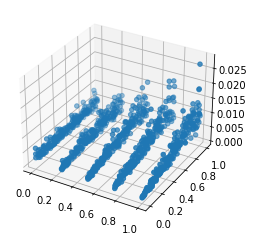

In [312]:
x = automation_speed_df['degree of automation']
y = automation_speed_df['non-standard ratio']
z = automation_speed_df['speed to complexity']

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, 'gray')

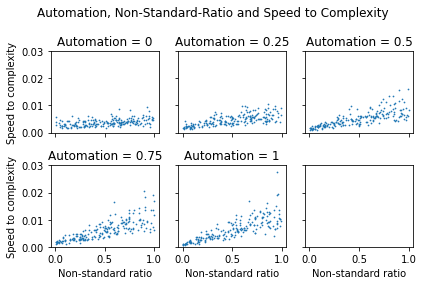

In [313]:
rows, cols = 2, 3
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

for row in range(rows):
    for col in range(cols):
        a_index = row*cols+col
        if a_index < len(a_values):
            a = a_values[a_index]
            
            filtered_df = automation_speed_df[automation_speed_df['degree of automation'] == a]
            x = filtered_df['non-standard ratio']
            y = filtered_df['speed to complexity']
            
            ax[row, col].scatter(x, y, s=0.5)
            ax[row, col].set(title=f'Automation = {a}', ylim=(0, 0.03))
            
        if row == rows-1:
            ax[row, col].set(xlabel='Non-standard ratio')
        if col == 0:
            ax[row, col].set(ylabel='Speed to complexity')

fig.suptitle('Automation, Non-Standard-Ratio and Speed to Complexity')
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.savefig('experiment_results/multi_variable_speed.png', dpi=300, bbox_inches='tight')
plt.show()

#### Analysis of max complexity

In [314]:
automation_max_complexity_list = []
for a_value in a_values:
    simulation_results = rq2_simulation_results[a_value]
    
    time_to_measure = 200

    # compute the speed of growth for the complexity measure until time x
    for simulation_result in simulation_results:
        i = simulation_result['settings']['i']
        results_df = simulation_result['results_df']
        
        max_complexity = max(results_df[complexity_measure.lower()])
        automation_max_complexity_list.append((a_value, i, max_complexity))

automation_max_complexity_df = pd.DataFrame(automation_max_complexity_list, columns=['degree of automation', 'non-standard ratio', 'max complexity'])
automation_max_complexity_df

,degree of automation,non-standard ratio,max complexity
0,0.0,0.206844,1.975000
1,0.0,0.912362,3.010000
2,0.0,0.569753,2.301020
3,0.0,0.006175,1.690000
4,0.0,0.632566,1.658163
...,...,...,...
995,1.0,0.924699,12.500000
996,1.0,0.431778,1.785714
997,1.0,0.076074,1.570000
998,1.0,0.082694,1.390000


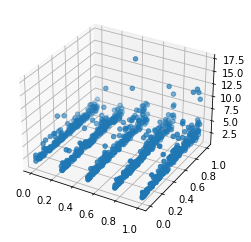

In [315]:
x = automation_max_complexity_df['degree of automation']
y = automation_max_complexity_df['non-standard ratio']
z = automation_max_complexity_df['max complexity']

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, 'gray')

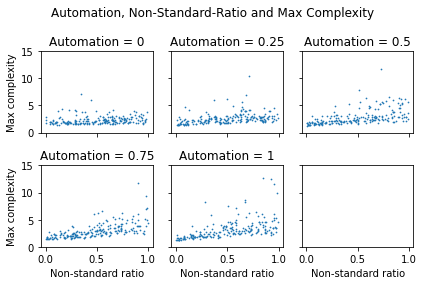

In [316]:
rows, cols = 2, 3
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

for row in range(rows):
    for col in range(cols):
        a_index = row*cols+col
        if a_index < len(a_values):
            a = a_values[a_index]
            
            filtered_df = automation_max_complexity_df[automation_max_complexity_df['degree of automation'] == a]
            x = filtered_df['non-standard ratio']
            y = filtered_df['max complexity']
            
            ax[row, col].scatter(x, y, s=0.5)
            ax[row, col].set(title=f'Automation = {a}', ylim=(0, 15)) # ylim=(0, 0.03))
            
        if row == rows-1:
            ax[row, col].set(xlabel='Non-standard ratio')
        if col == 0:
            ax[row, col].set(ylabel='Max complexity')

fig.suptitle('Automation, Non-Standard-Ratio and Max Complexity')
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.savefig('experiment_results/multi_variable_max_comp.png', dpi=300, bbox_inches='tight')
plt.show()